In [ ]:
# artist influence analysis

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from networkx.algorithms import community

In [3]:
data = pd.read_table("data/influence_data.csv", sep=",")
#construct network
G = nx.DiGraph()  
G.add_edges_from(np.array(data[["follower_id", "influencer_id"]]).tolist())

[(754032, 615), (66915, 389), (894465, 319), (531986, 238), (139026, 221), (354105, 201), (100160, 192), (41874, 186), (549797, 184), (840402, 181), (771438, 171), (316834, 169), (180228, 166), (423829, 160), (120521, 159), (631774, 158), (128099, 154), (418740, 153), (577627, 149), (379125, 148)]


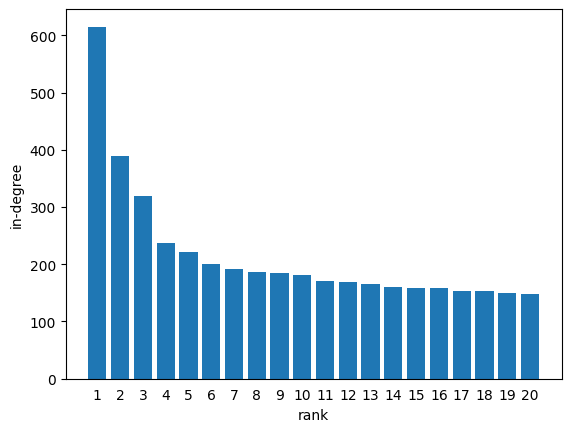

In [5]:
# influence parameters
deg_rank = sorted(G.in_degree(), key=lambda x: -x[1])
print(deg_rank[:20])
#print([x[0] for x in deg_rank])
xx = np.arange(1, 21)
plt.bar(xx, [x[1] for x in deg_rank][:20])
plt.tick_params(bottom=False)
plt.xticks(xx)
plt.xlabel('rank')
plt.ylabel('in-degree')
plt.show()

[(532957, 0.02051961866024842), (79016, 0.019569981196940197), (259529, 0.016919800073413795), (287604, 0.013418228207195827), (3829, 0.00986316888159023), (13511, 0.009149727137862182), (754032, 0.009066991055198512), (403120, 0.0076059861966893344), (848784, 0.006816520436714867), (805930, 0.006716700756035386), (898336, 0.00668727764069286), (898331, 0.0066491143977242435), (608701, 0.006585532692250077), (66915, 0.005737017006405378), (577531, 0.005612275638977474), (317093, 0.005426282725150885), (82584, 0.005106361344620532), (549797, 0.004855256586987331), (120521, 0.0045902896800542065), (46861, 0.004407626172269078)]


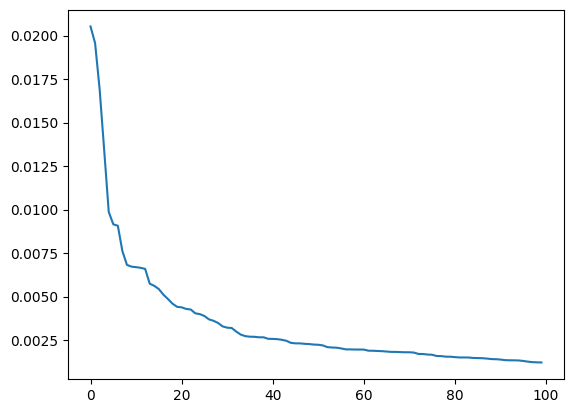

In [6]:
#PageRank
pr = nx.pagerank(G)
pr_rank = sorted(list(pr.items()), key=lambda x: -x[1])
print(pr_rank[:20])
#print([x[0] for x in pr_rank])
plt.plot(range(100), [x[1] for x in pr_rank][:100])
plt.show()

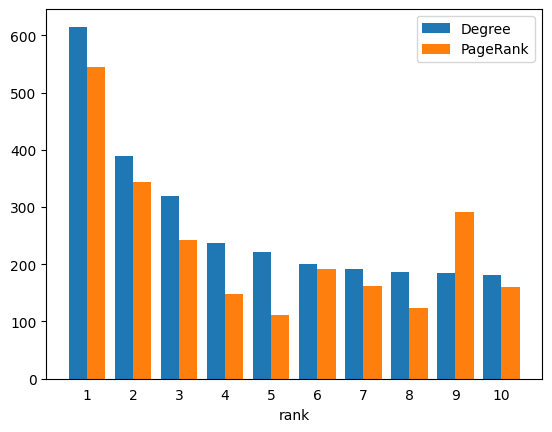

In [8]:
N = 10
xx = np.arange(N)
plt.bar(xx, [x[1] for x in deg_rank[:N]], width=0.4, label="Degree")
plt.bar(xx+0.4, [dict(pr_rank)[x[0]]*60000 for x in deg_rank[:N]], width=0.4, label="PageRank")
plt.tick_params(bottom=False)
plt.xticks(xx+0.2, xx+1)
plt.xlabel('rank')
plt.legend()
plt.show()

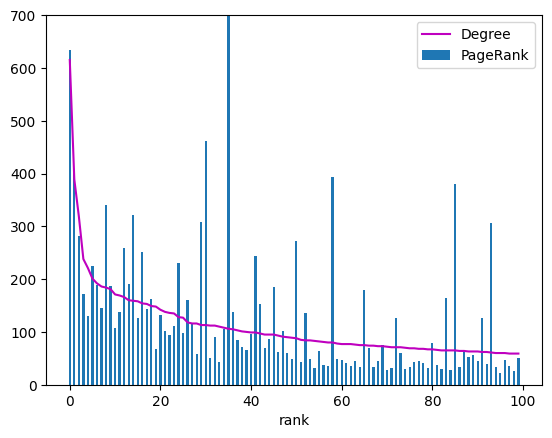

In [9]:
N = 100
xx = np.arange(N)
plt.plot(xx, [x[1] for x in deg_rank[:N]], label="Degree", color='m')
plt.bar(xx, [dict(pr_rank)[x[0]]*70000 for x in deg_rank[:N]], width=0.5, label="PageRank")
plt.ylim(0, 700)
plt.xlabel('rank')
plt.legend()
plt.show()

In [11]:
artists = pd.read_table("data/sort_genre_year.csv", sep=",").sort_values(by=["artist_id"]).set_index(['artist_id'])
artists['influence'] = 0
for aid, pr in pr_rank:
    artists.loc[aid, 'influence'] = pr
artists.to_csv('data/artists.csv', sep=',', header=True, index=True)
sum([x[1] for x in pr_rank])

1.0000000000000413

In [12]:
#top N artists with highest influence
N = 30
Gt = nx.DiGraph()
tnodes = [x[0] for x in pr_rank[:N]]
Gt.add_nodes_from(tnodes)
tdata = data[["follower_id", "influencer_id"]]
for i in tdata.index:
    r = tdata.loc[i].values
    if (r[0] in tnodes and r[1] in tnodes):
        Gt.add_edge(*r)
artists.loc[[x[0] for x in pr_rank[:N]]]

,artist_name,artist_main_genre,artist_active_start,influence
artist_id,,,,
532957,Cab Calloway,Jazz,1930.0,0.020520
79016,Billie Holiday,Vocal,1930.0,0.019570
259529,Lester Young,Jazz,1930.0,0.016920
287604,Louis Jordan,Jazz,1930.0,0.013418
3829,T-Bone Walker,Blues,1930.0,0.009863
13511,Sister Rosetta Tharpe,Religious,1930.0,0.009150
754032,The Beatles,Pop/Rock,1960.0,0.009067
403120,The Mills Brothers,Vocal,1930.0,0.007606
848784,Roy Acuff,Country,1930.0,0.006817


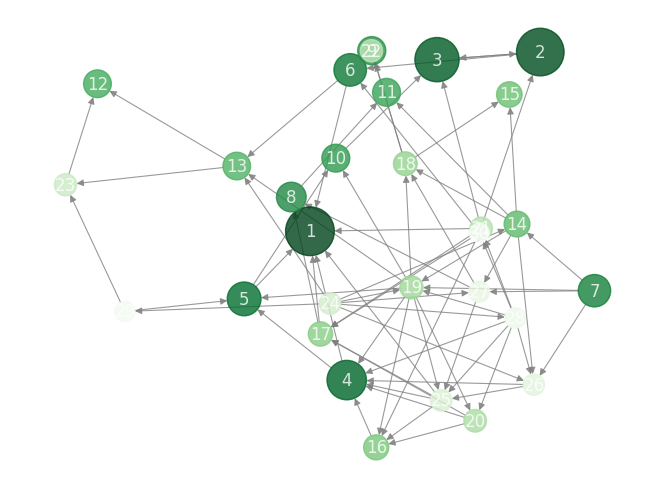

In [14]:
opt = {
    "pos": nx.kamada_kawai_layout(Gt),
    "node_size": [x[1] * 60000 for x in pr_rank[:N]],
    "with_labels": True,
    "labels": dict(zip(tnodes, list(range(1, N+1)))),
    "font_color": "w",
    "node_color": range(N, 0, -1),
    "cmap": plt.cm.Greens,
    "edge_color": "gray",
    "width": 0.8,
    "alpha": 0.8
}
nx.draw(Gt, **opt)
plt.show()

In [15]:
# genre influence analysis
G = nx.DiGraph()  # 创建空的有向图
data_genre = data[["follower_main_genre", "influencer_main_genre"]]
genre_t = data_genre.groupby(["follower_main_genre", "influencer_main_genre"]).agg({"influencer_main_genre": "count"})
genre_t.columns = ["weight"]
genre_list = np.array(genre_t.reset_index()).tolist()
G.add_weighted_edges_from(genre_list)
sorted(G.in_degree(), key=lambda x: -x[1])

[('Jazz', 19),
 ('Pop/Rock', 19),
 ('Vocal', 18),
 ('International', 16),
 ('R&B;', 16),
 ('Country', 15),
 ('Folk', 14),
 ('Blues', 13),
 ('Latin', 13),
 ('Classical', 12),
 ('Stage & Screen', 12),
 ('New Age', 11),
 ('Comedy/Spoken', 10),
 ('Easy Listening', 9),
 ('Electronic', 7),
 ('Reggae', 7),
 ('Avant-Garde', 6),
 ('Religious', 6),
 ("Children's", 2),
 ('Unknown', 2)]

In [16]:
pr = nx.pagerank(G)
pr_rank = sorted(list(pr.items()), key=lambda x: -x[1])
print(pr_rank)

[('Pop/Rock', 0.2664575203089838), ('Jazz', 0.14195266419005537), ('R&B;', 0.13253595163404075), ('Vocal', 0.07573359677581155), ('Country', 0.06435860795985986), ('Blues', 0.047926469693945144), ('Latin', 0.03132420413079681), ('Reggae', 0.030504598131647756), ('Folk', 0.03017147541996694), ('Stage & Screen', 0.028099412818305754), ('Comedy/Spoken', 0.02354546588746769), ('International', 0.023103960719456397), ('Electronic', 0.01682105054922272), ('Classical', 0.016302103574932787), ('Religious', 0.015414924752728964), ('Easy Listening', 0.014188479036895883), ('New Age', 0.012198005326734955), ('Avant-Garde', 0.011300977678228932), ("Children's", 0.010476698776342247), ('Unknown', 0.007583832634575836)]


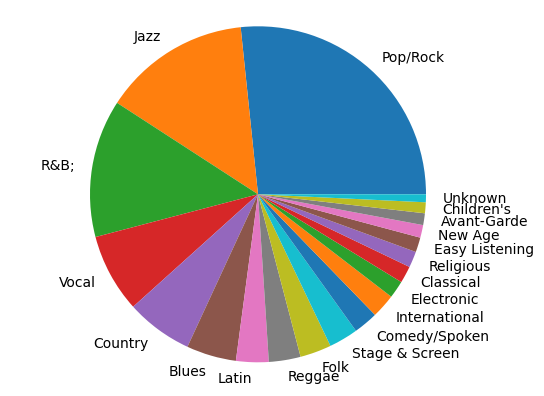

In [18]:
plt.pie([x[1] for x in pr_rank],labels = [x[0] for x in pr_rank])
#plt.legend()
plt.axis('equal')
plt.show()

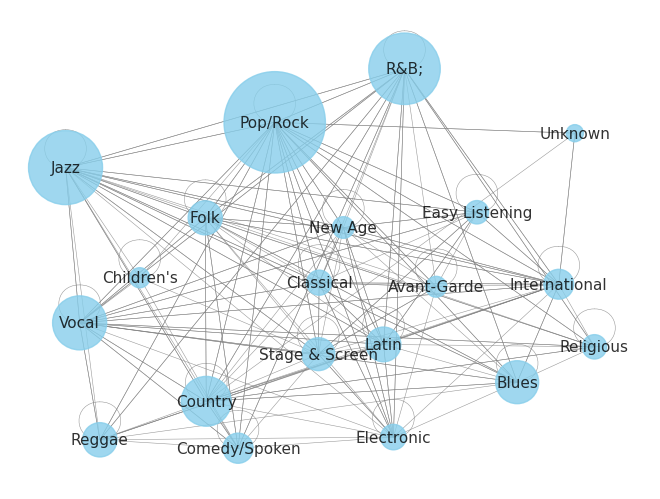

In [20]:
opt = {
    "pos": nx.kamada_kawai_layout(G),
    #"pos": nx.spring_layout(G),
    "node_size": [x * 20000 for x in pr.values()],
    "node_color": 'skyblue',
    "edge_color": 'gray',
    "width": 0.4,
    "arrows": False,
    "with_labels": True,
    "font_size": 11,
    "font_color": 'k',
    "alpha": 0.8
}
nx.draw(G, **opt)
plt.show()